In [1]:
# Import-statements

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from ipywidgets import widgets, interact, interactive,fixed
from IPython.display import display

print("Done importing")

Done importing


In [2]:
# Load the data needed

patient_data = pickle.load(open("data/all_pat.p","rb"))
rm_data = pickle.load(open("data/rm.p", "rb"))

print("Loaded patient data...")

#print patient_data
#print rm_data

print("Number of unique patients loaded:")
print(str(len(patient_data["P_num"].unique())))

print("Number of unique organs in each patient:")
print(str(len(patient_data["Organ"].unique())))

print("Highest gamma-dose:")
print(str(patient_data['Gamma'].max()))

print("Highest beta-dose:")
print(str(patient_data['Beta'].max()))

print("Highest Total-dose per administered:")
print(str(patient_data['Total'].max()))

#print(str(patient_data["Organ"].unique()))


Loaded patient data...
Number of unique patients loaded:
6
Number of unique organs in each patient:
25
Highest gamma-dose:
0.0768
Highest beta-dose:
3.52
Highest Total-dose per administered:
3.6


In [4]:
# Setting up ways to interact with the data...

organ_name = widgets.Text()
update_figure_button = widgets.Button(description = "Click me to update")
clear_figure_button = widgets.Button(description = "Click me to clear")
new_figure_button = widgets.Button(description = "Click me to open new figure")

opt = ('Total', 'Beta', 'Gamma')

def handle_submit(sender):
    print(organ_name.value)
    
def print_total_dose(sender):
    
    print(organ_name.value)
    print(patient_data[organ_name.value])
    
def dummy(val):  
    
    data_to_plot = (patient_data[val].values)
    #print patient_data[val].values
    return data_to_plot
    
def on_button_click(b):
    
    plt.plot(w.result)
    plt.show()
    
def on_button_click_clear(c):
    
    plt.clf()
    
def on_button_new_figure(d):
    
    plt.figure()
    
def print_var(var):
    
    print var
    
def return_var(var):
    
    return var
    

#organ_name.on_submit(handle_submit)
#organ_name.on_submit(print_total_dose)

plt.figure()

w = interactive(dummy, val = opt)
ww = interactive(dummy, val = opt)

display(w);
display(ww);

#display(update_figure_button)
#display(clear_figure_button)
#display(new_figure_button)



#update_figure_button.on_click(on_button_click)
#clear_figure_button.on_click(on_button_click_clear)
#new_figure_button(on_button_new_figure)



array([ 0.0734,  0.0547,  0.0537,  0.0737,  0.0616,  0.0624,  0.0667,
        0.0638,  0.0633,  0.301 ,  0.696 ,  0.0621,  0.0573,  0.0621,
        0.0786,  1.39  ,  0.628 ,  0.0518,  2.65  ,  0.0573,  0.0547,
        0.0582,  0.0606,  0.0833,  0.0992,  0.0819,  0.0811,  0.103 ,
        0.0882,  0.0907,  0.0932,  0.0912,  0.0908,  0.276 ,  0.739 ,
        0.0886,  0.0849,  0.0894,  0.104 ,  0.63  ,  0.49  ,  0.0796,
        1.54  ,  0.082 ,  0.0851,  0.0841,  0.0863,  0.0888,  0.117 ,
        0.141 ,  0.125 ,  0.124 ,  0.144 ,  0.132 ,  0.134 ,  0.134 ,
        0.135 ,  0.133 ,  0.793 ,  1.15  ,  0.131 ,  0.128 ,  0.134 ,
        0.143 ,  1.18  ,  0.698 ,  0.122 ,  3.6   ,  0.125 ,  0.129 ,
        0.128 ,  0.13  ,  0.133 ,  0.174 ,  0.114 ,  0.0978,  0.0971,
        0.119 ,  0.104 ,  0.106 ,  0.11  ,  0.107 ,  0.107 ,  0.312 ,
        1.01  ,  0.104 ,  0.101 ,  0.105 ,  0.12  ,  0.0791,  0.308 ,
        0.0956,  3.28  ,  0.0986,  0.101 ,  0.1   ,  0.103 ,  0.105 ,
        0.125 ,  0.0

In [5]:
# Function that can gather all the needed doses from a certain organ across patients...

def get_doses(data_set, organ, dose_type):
    
    sub = data_set[data_set.Organ == organ]
    data_points = sub[dose_type]
    return data_points.values

def get_organ_names(data_set):
    
    unic = data_set["Organ"].unique()
    return unic
    
get_doses(patient_data, "Liver", "Total")

opt_organs = tuple(get_organ_names(patient_data))

w = interactive(return_var, var = opt_organs)
ww = interactive(return_var, var = opt_organs)



display(w)
display(ww)



u'Adrenals'

<IPython.core.display.Javascript object>


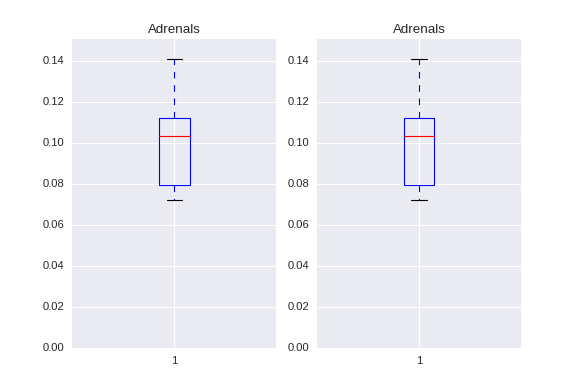

In [6]:

dose_1 = get_doses(patient_data, w.result, "Total")
dose_2 = get_doses(patient_data, ww.result, "Total")

max_y = np.max([dose_1, dose_2]) + 0.01

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(dose_1)
ax1.set_title(w.result)
ax1.set_ylim([0, max_y])
ax2.boxplot(dose_2)
ax2.set_ylim([0, max_y])
ax2.set_title(ww.result)

plt.show()

#plt.show()

u'Ovaries'

[u'Stomach Wall', u'Liver', u'Ovaries']


<IPython.core.display.Javascript object>


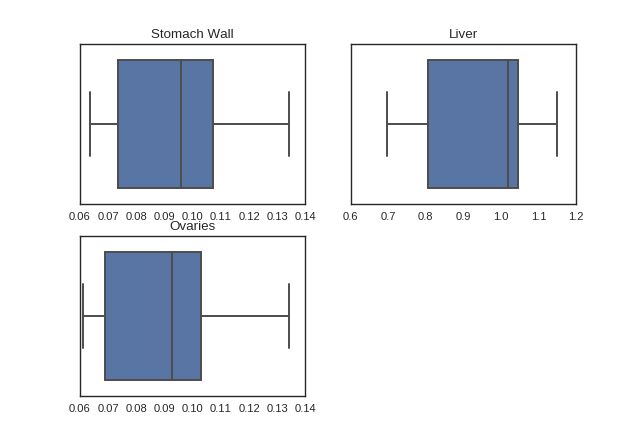

2
2


<IPython.core.display.Javascript object>


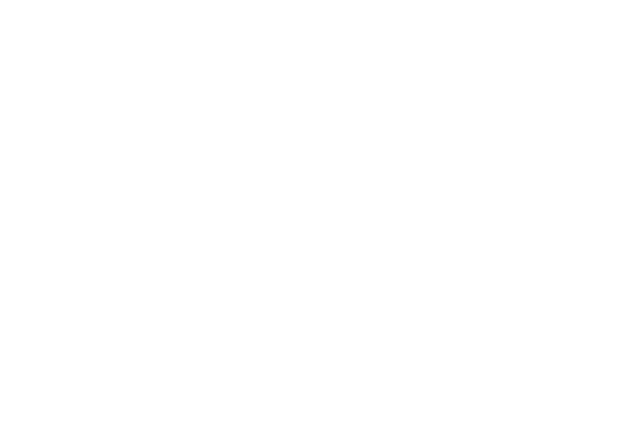

TypeError: 'numpy.ndarray' object is not callable

In [7]:

append_to_dynamic_organ = widgets.Button(description = "Click me to add current organ")
show_boxplots = widgets.Button(description = "Click me to show boxplots")
clear_organs = widgets.Button(description = "Click me clear organs")


def on_button_click_append(c):
    
    dynamic_organ_list.append(w)
    dynamic_organ_list_names.append(w.result)
    print dynamic_organ_list_names
    
def on_button_click_show_boxes(d):
    
    plt.figure()

    sub_y = 2
    sub_x = (len(dynamic_organ_list_names)/2)+1

    print sub_y
    print sub_x
    
    sns.set_style('white')

    for i in range(0,len(dynamic_organ_list_names)):
    
        plt.subplot(sub_x, sub_y, i+1)
        sns.boxplot(get_doses(patient_data, dynamic_organ_list_names[i], "Total"))
        plt.title(dynamic_organ_list_names[i])
        plt.ylabel("mGy/MBq")
        plt.ylabel("")
        
    # Better figure...
    
    plt.figure()
    
    # Check first the data to set up the number of boxes...
    
    num = len(dynamic_organ_list_names)
    
    x_line = np.arange(num)
    
    data_1 = get_doses(patient_data, dynamic_organ_list_names[0], "Total")
    
    sns.boxplot(x_line(0),data_1)
    
    
    plt.show()
    
    
def on_click_clear_organs(e):
    
    dynamic_organ_list = []
    dynamic_organ_list_names = []


w = interactive(return_var, var = opt_organs)

append_to_dynamic_organ.on_click(on_button_click_append)
show_boxplots.on_click(on_button_click_show_boxes)
clear_organs.on_click(on_click_clear_organs)

display(w)
display(append_to_dynamic_organ)
display(show_boxplots)
display(clear_organs)

dynamic_organ_list = []
dynamic_organ_list_names = []

(u'Stomach Wall', u'Liver', u'Ovaries')


<IPython.core.display.Javascript object>


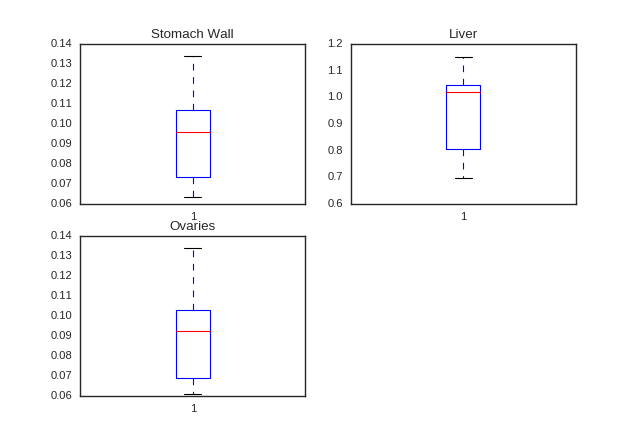

2
2


In [8]:
print tuple(dynamic_organ_list_names)

plt.figure()

sub_y = 2
sub_x = (len(dynamic_organ_list_names)/2)+1

print sub_y
print sub_x

for i in range(0,len(dynamic_organ_list_names)):
    
    plt.subplot(sub_x, sub_y, i+1)
    plt.boxplot(get_doses(patient_data, dynamic_organ_list_names[i], "Total"))
    plt.title(dynamic_organ_list_names[i])
    
plt.show()
    
    

<IPython.core.display.Javascript object>


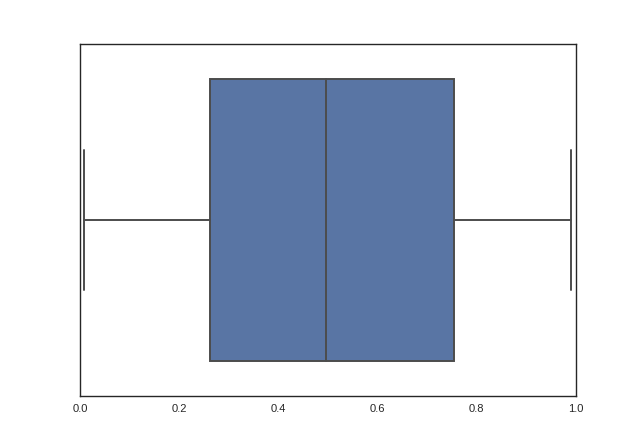

[[array([ 0.54363005,  0.3219105 ,  0.04295729,  0.64914505,  0.22376031,
        0.77514175,  0.18677269,  0.30454345,  0.16148412,  0.91618315,
        0.00810561,  0.03268846,  0.57168291,  0.33668522,  0.34864949,
        0.54275046,  0.7896997 ,  0.78032194,  0.49418407,  0.32948734,
        0.71089635,  0.49511238,  0.8189114 ,  0.11289096,  0.55628513,
        0.30537211,  0.73118992,  0.13457033,  0.70153314,  0.03968379,
        0.347507  ,  0.04929568,  0.50667542,  0.07289638,  0.64238877,
        0.23218333,  0.02305435,  0.49405072,  0.97464767,  0.81731943,
        0.01621739,  0.68187896,  0.65534733,  0.5609129 ,  0.82745143,
        0.4049433 ,  0.36651041,  0.05904512,  0.37327918,  0.79298734,
        0.46011109,  0.32619616,  0.43694295,  0.10464658,  0.84250371,
        0.61331672,  0.8933888 ,  0.75387142,  0.12444674,  0.39283347,
        0.060283  ,  0.7106747 ,  0.90200691,  0.46747216,  0.89844149,
        0.79632174,  0.05391803,  0.26426694,  0.82680585,  0.

In [9]:
# Better figure...
    
plt.figure()
    
# Check first the data to set up the number of boxes...
    
num = len(dynamic_organ_list_names)
    
x_line = np.arange(num)
    
data_1 = get_doses(patient_data, dynamic_organ_list_names[0], "Total")
data_2 = get_doses(patient_data, dynamic_organ_list_names[1], "Total")

data = [data_1,data_2]

data = [[np.random.rand(100)] for i in range(3)]

print(data)

sns.boxplot(data)
    
    
plt.show()

[ 0.696  0.739  1.15   1.01   1.05   1.03 ]
[[ 0.0734  0.0547  0.0537  0.0737  0.0616  0.0624  0.0667  0.0638  0.0633
   0.301   0.696   0.0621  0.0573  0.0621  0.0786  1.39    0.628   0.0518
   2.65    0.0573  0.0547  0.0582  0.0606  0.0833  0.    ]
 [ 0.0992  0.0819  0.0811  0.103   0.0882  0.0907  0.0932  0.0912  0.0908
   0.276   0.739   0.0886  0.0849  0.0894  0.104   0.63    0.49    0.0796
   1.54    0.0851  0.0841  0.0863  0.0888  0.117   0.    ]
 [ 0.141   0.125   0.124   0.144   0.132   0.134   0.134   0.135   0.133
   0.793   1.15    0.131   0.128   0.134   0.143   1.18    0.698   0.122
   3.6     0.129   0.128   0.13    0.133   0.174   0.    ]
 [ 0.114   0.0978  0.0971  0.119   0.104   0.106   0.11    0.107   0.107
   0.312   1.01    0.104   0.101   0.105   0.12    0.0791  0.308   0.0956
   3.28    0.101   0.1     0.103   0.105   0.125   0.    ]
 [ 0.0724  0.0536  0.0533  0.0747  0.0601  0.0622  0.0636  0.0625  0.0618
   0.297   1.05    0.0603  0.0565  0.0612  0.0747  1.44  

<IPython.core.display.Javascript object>


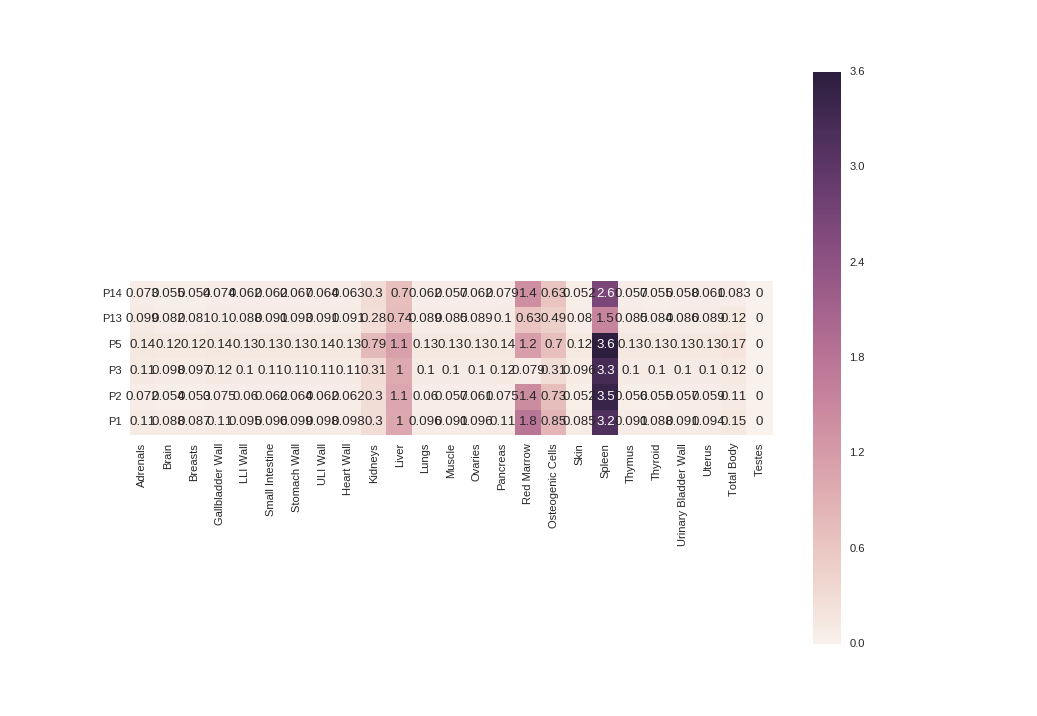

In [47]:
# Experimenting with heatmaps

# Set up the data for the figure

data = get_doses(patient_data, "Liver", "Total")

data_matrix = np.zeros([6,len(opt_organs)])

list_of_organs = ["Liver", "Spleen", "Kidneys", "Brain"]
patient_list = ["P1", "P2", "P3", "P5", "P13", "P14"]

for j in range(0,24):
    
    data_matrix[:,j] = get_doses(patient_data, opt_organs[j], "Total")

print data

print data_matrix

plt.figure()
ax = sns.heatmap(data_matrix, square = True, annot = True)
ax.set_xticklabels(opt_organs, rotation = 90)
ax.set_yticklabels(patient_list, rotation = 360)


